# 本地数据源

## CSV文件

- csv_writer = csv.writer(file_obj)
- csv_writer.writerow(tuple)
- csv_reader = csv.reader(file_obj)
- 注意打开文件时用utf_8_sig编码，newline=""

In [106]:
import csv

with open("./demo_new.csv",'w', encoding='utf_8_sig', newline="") as f:
    csv_writer = csv.writer(f)
    csv_writer.writerow(("商品名称", "售价"))
    for i in range(2):
        good_name = input("请输入商品名称：")
        good_price = input("请输入商品价格：")
        csv_writer.writerow((good_name, good_price))

请输入商品名称：商品1
请输入商品价格：40
请输入商品名称：商品2
请输入商品价格：50


In [108]:
import csv

with open("./demo_new.csv",'r', encoding='utf_8_sig', newline="") as f:
    csv_reader = csv.reader(f)
    for i in csv_reader:
        print(i[0], i[1])
    

商品名称 售价
商品1 40
商品2 50


## Excel文件的读写

- 创建Workbook对象：`wb = openpyxl.Workbook()`
- 保存Workbook对象到xlsx文件：`wb.save("test.xlsx")`
- 打开现有xlsx文件：`wb = openpyxl.load_workbook("test.xlsx")`

- 通过工作表名称获取sheet页面2：`ws1 = wb["Sheet"]`
- 创建新的sheet页面（保存时才生效）：`ws2 = wb.create_sheet("Sheet2")`
- 给已有sheet重命名：`ws1.title = "New"`

**单元格操作**
- 给表格赋值（保存时才生效）：`ws2["A1"] = "Test"`
- 在指定行、列的单元格中写入数据：`ws1.cell(row=3, column=2).value = "AAAAA"`
- 获取最大的行数：`ws2.max_row`
- 获取最大的列数：`ws2.max_column`
- 采用iter_cols方法:

```python
for col in ws1.iter_cols(min_row=2, min_col=2, max_row=7, max_col=6):
    for cell in col:
        print(cell.value)
```

In [110]:
import openpyxl

wb = openpyxl.Workbook()

ws = wb["Sheet"]

ws["A1"].value = 100

wb.save("./new_excel.xlsx")

In [112]:
wb1 = openpyxl.load_workbook("./new_excel.xlsx")

ws1 = wb1["Sheet"]

print(ws1["A1"].value)

ws1["A1"].value = 200

wb1.save("./new_excel.xlsx")

100


### 练习：将taobao_sales.csv文件中的销量数据调整成整型并保存到Excel文件中

In [149]:
for i in ["a.txt", 'b.txt', 'c.txt']:
    print(i)

a.txt
b.txt
c.txt


In [152]:
import os

file_list = os.listdir()
print(file_list)

['new_excel.xlsx', 'stock_code_and_name.csv', '01_Python数据源及数据清洗.ipynb', 'pingan.xlsx', 'Python基础.xmind', 'demo_new.csv', '-01_Python基础.ipynb', '01_标准数据类型 (1).md', '.DS_Store', '02_控制流_函数.md', 'baiku.txt', 'goods.xlsx', 'images', 'news.txt', '~$Python精彩世界入门_V2.0.pptx', 'demo.docx', '02_控制流_函数_day2.md', '06-测试题.ipynb', '-03_Python第三方数据处理工具.ipynb', '未命名1.ipynb', '01_标准数据类型.md', 'error.log', 'code', 'demo1.xlsx', 'new.csv', 'jupyter使用.ipynb', '01_Python基础语法.pdf', '决策树案例.ipynb', '01_Python基础语法.md', '03_常用内置模块.md', 'my.xlsx', '未命名.ipynb', 'new_dir', '-03_Python第三方数据处理工具-copy.ipynb', 'demo3.xlsx', '04-Python自动化操作.ipynb', 'good.xlsx', '03-Python数据分析应用实战.ipynb', 'taobao_sale.csv', 'baik.xlsx', '-02_Python基础进阶.ipynb', '.ipynb_checkpoints', '202007141648265261', 'baiku_demo', 'chromedriver', 'taobao_sale.xlsx', '新型冠状病毒疫情新闻数据采集及词云展示.pdf', 'baiku.xlsx', 'resource', 'data', 'demo01.docx', 'new.xlsx', '02-Python数据分析工具介绍.ipynb']


In [146]:
import csv
import openpyxl

with open("./taobao_sale.csv", encoding='utf_8_sig', newline="") as f:
    csv_reader = csv.reader(f)
    line_list = []
    for line in csv_reader:
        if line[-1] == "商品销量":
            line_list.append(line)
            continue
        line[-2] = line[-2].strip()
        line[-2] = float(line[-2].replace("¥", ""))
        print(line)
        if "万" in line[-1]:
            line[-1] = int(float(line[-1].replace("人付款", "").replace("+", "").replace("万", ""))*10000)
        else:
            line[-1] = int(line[-1].replace("人付款", "").replace("+", ""))
#         print(line)
        line_list.append(line)

wb2 = openpyxl.Workbook()
ws2 = wb2["Sheet"]

for i in line_list:
    ws2.append(i)

wb2.save("./taobao_sale.xlsx")


['天猫超市', '上海', '欧莱雅紫熨斗眼霜保湿抗皱淡化细纹黑眼圈30ml', 489.0, '0人付款']
['天猫超市', '上海', '巴黎欧莱雅精油润养洗发水护发素洗护套装正品 改善干枯 柔顺头发', 89.9, '1.0万+人付款']
['天猫超市', '上海', '欧莱雅蒸汽发膜帽x2 正品修复干枯奇焕垂顺精油焗油护发改善毛躁', 69.9, '1921人付款']
['天猫超市', '上海', '欧莱雅小花源清新茉莉香水护发精油100ml 头发免洗柔顺修护干枯发', 109.0, '1344人付款']
['天猫超市', '上海', '欧莱雅发膜女免蒸精油护发素正品修复干枯焗油膏倒膜头发营养护理', 39.0, '2778人付款']
['天猫超市', '上海', '欧莱雅大金瓶精油洗发水奇焕垂顺洗发露洗头膏+奇焕垂顺润发乳', 168.0, '245人付款']
['天猫超市', '江苏 苏州', '欧莱雅男士专用洗面奶护肤品套装补水控油抗痘去黑头火山泥洁面乳', 99.0, '5.0万+人付款']
['天猫超市', '江苏 苏州', '欧莱雅男士护肤品套装补水保湿乳洗面奶洗脸男士专用水乳套装全套', 189.0, '3.0万+人付款']
['天猫超市', '浙江 杭州', "L'OREAL /欧莱雅玻尿酸日晚霜眼霜孚波因抗皱保湿补水套装精华", 479.0, '13人付款']
['天猫超市', '浙江 杭州', '欧莱雅金致臻颜牡丹奢养粉妍精华+面霜精华水补水保湿套装套盒', 275.0, '15人付款']
['天猫超市', '江苏 苏州', '欧莱雅小金管麦色滤面部防紫外线防晒伤隔离防晒霜SPF50+男女30ml', 149.0, '9.0万+人付款']
['天猫超市', '上海', '欧莱雅男士洗面奶男清洁控油磨砂抗黑头洁面膏洁面乳去黑头缩毛孔', 37.9, '8500+人付款']
['天猫超市', '广东 深圳', '欧莱雅小黑瓶50ml青春密码酵素面部精华补水紧致抗衰老初老肌底液', 139.0, '1304人付款']
['欧莱雅男士官方旗舰店', '江苏 苏州', '欧莱雅男士控油炭爽抗黑头洁面膏清洁洗面奶祛黑头洁面乳官方正品', 39.0, '2.5万+人付款']
['欧莱雅男士官方旗舰店', '上海', '欧莱雅男士专用洗面奶男控油祛痘

## World文件的读写

In [46]:
!pip3 install python-docx

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
     |████████████████████████████████| 5.5 MB 6.6 MB/s eta 0:00:01
  Created wheel for python-docx: filename=python_docx-0.8.10-py3-none-any.whl size=184489 sha256=9ec706530382f4e95bf74e0f57eefb45c8fc82609f10602faf10e44387629af0
  Stored in directory: /Users/evenyan/Library/Caches/pip/wheels/e8/6e/8e/85c45bffcdea274bb0571aecc3db34f80d2e388c707990dd63
Successfully built python-docx


**Document**

**paragraphs**

**text**

In [136]:
from docx import Document

d = Document("./demo.docx")

paragraph_list = d.paragraphs

for p in paragraph_list:
    print(p.text)


京东物流很给力早上下单晚上就收到了，紫黑色的玻璃瓶身很有质感，乳白色的霜体，味道很温和，不仔细闻闻不到香味，质地很细腻温润，触感丝滑，上脸不粘腻，油皮用起来也挺清爽的，按摩几下就吸收了，肤感不错，感觉也挺保湿的，一次一粒米大小的量应该能用很久，期待可以淡化我的黑眼
使用感受：效果非常不错，随着年龄增加，精华液一定用起来适合肤质：适合各种肌肤，过敏肌肤除外，过敏肌肤要先试用一下吸收效果：非常容易吸收，不油腻，可以减少细纹保湿效果：保湿也很好，用完水再用精华，鲜活肌肤其他特色：气味清香，密集滋润，丝般柔滑，瓶子包装也很高大上，天天使用，肌肤质地可以得到改善，重现年轻光彩



In [138]:
d1 = Document()

d1.add_paragraph("这是一段新的文字")

d1.save("demo01.docx")

### 练习：将如下文本添加到Word文档中
> 京东物流很给力早上下单晚上就收到了，紫黑色的玻璃瓶身很有质感，乳白色的霜体，味道很温和，不仔细闻闻不到香味，质地很细腻温润，触感丝滑，上脸不粘腻，油皮用起来也挺清爽的，按摩几下就吸收了，肤感不错，感觉也挺保湿的，一次一粒米大小的量应该能用很久，期待可以淡化我的黑眼\n使用感受：效果非常不错，随着年龄增加，精华液一定用起来适合肤质：适合各种肌肤，过敏肌肤除外，过敏肌肤要先试用一下吸收效果：非常容易吸收，不油腻，可以减少细纹保湿效果：保湿也很好，用完水再用精华，鲜活肌肤其他特色：气味清香，密集滋润，丝般柔滑，瓶子包装也很高大上，天天使用，肌肤质地可以得到改善，重现年轻光彩。

- 注意：文本中\n表示换行，将每一行作为一个段落

## PDF数据源

In [ ]:
!pip3 install pdfplumber

**pdfplumber模块的基本使用**
- 打开PDF文件：`pdf = pdfplumber.open(pdf_file_name)`
- 获取PDF文件的所有页面：`pages = pdf.pages`
- 获取第一页PDF文件的内容：`text = pages[0].extract_text()`
- 关闭PDF文件的IO管道：`pdf.close()`

### 将PDF文件"公司A理财公告.PDF"中的表格提取到Excel中

In [143]:
import pdfplumber

pdf = pdfplumber.open("./data/pdf_data/公司A理财公告.PDF")

pages = pdf.pages

pages[3].extract_table()

[['产品序号',
  '产品名称',
  '委托理财\n金额（亿\n元）',
  '受托人\n类型',
  '资金来源',
  '是否\n保本',
  '预计年化\n收益率\n（%）',
  '产品\n期限',
  '产品\n资金\n投向',
  '备注'],
 ['ZH070417009102D61',
  '“乾元—特享\n型”2017年第\n107期理财产\n品',
  '0.1',
  '银行',
  '自有资金',
  '否',
  '4.65%',
  '102天\n（不\n含产\n品到\n期日）',
  '银行\n理财\n资金\n池',
  '详见公司\n临\n2017-098\n号公告'],
 ['SAA937',
  '荣耀专享14\n号（已于\n2017年12\n月20日清\n盘）',
  '0.2',
  '证券公\n司',
  '自有资金',
  '是',
  '4.9%',
  '96天',
  '补充\n营运\n资金',
  '详见公司\n临\n2017-099\n号公告'],
 ['GGHJ035',
  '中国工商银\n行法人挂钩\n黄金人民币',
  '0.3',
  '银行',
  '自有资金',
  '否',
  '4.3%-4.5%',
  '105天',
  '银行\n理财\n资金',
  '详见公司\n临\n2017-102']]

## 数据库文件

### SQLite数据库介绍

**SQLite简介**
> SQLite是一个软件库，实现了自给自足的、无服务器的、事务性的 SQL 数据库引擎。同时它是一个零配置的数据库，这意味着与其他数据库一样，我们不需要在系统中配置。SQLite是一个增长最快的数据库引擎。同时其源代码不受版权限制。

**SQLite的优点**

- 不需要一个单独的服务器进程或操作的系统（无服务器的）。

- SQLite 不需要配置，这意味着不需要安装或管理。

- 跨平台，可在 UNIX（Linux, Mac OS-X, Android, iOS）和 Windows（Win32, WinCE, WinRT）中运行

- 是轻量级的，完全配置时小于 400KiB，省略可选功能配置时小于250KiB。

- 不需要任何外部的依赖。

- 完全兼容 ACID 的

- SQLite 支持 SQL92（SQL2）标准的大多数查询语言的功能。

**在Windows平台上安装sqlite数据库**

SQLite数据库链接: https://pan.baidu.com/s/1H3H5N0JuIcmpd0G8KCttLw  密码: efft

- 请访问 SQLite 下载页面，从 Windows 区下载预编译的二进制文件。

- 您需要下载 sqlite-tools-win32-*.zip 和 sqlite-dll-win32-*.zip 压缩文件。

- 在C盘创建文件夹 C:\sqlite，并在此文件夹下解压上面两个压缩文件，将得到 sqlite3.def、sqlite3.dll 和 sqlite3.exe 文件。

- 添加 C:\sqlite 到 PATH 环境变量
![image.png](./images/sqlite-1.jpg)

![image.png](./images/sqlite-2.jpg)

- 最后在命令提示符下，使用 sqlite3 命令，将显示如下结果。

```sqlite
C:\>sqlite3
SQLite version 3.7.15.2 2013-01-09 11:53:05
Enter ".help" for instructions
Enter SQL statements terminated with a ";"
sqlite>

```

**在macOS平台上安装sqlite数据库**

- 最新版本的 Mac OS X 会预安装 SQLite，但是如果没有可用的安装，只需按照如下步骤进行：

- 请访问 SQLite 下载页面，从源代码区下载 sqlite-autoconf-*.tar.gz。

- 安装步骤如下：

```shell
$ tar xvzf sqlite-autoconf-3080600.tar.gz
$ cd sqlite-autoconf-3080600
$ ./configure --prefix=/usr/local
$ make
$ make install
```



上述步骤将在 Mac OS X 机器上安装 SQLite，您可以使用下列命令进行验证：

```shell
$ sqlite3
SQLite version 3.7.15.2 2013-01-09 11:53:05
Enter ".help" for instructions
Enter SQL statements terminated with a ";"
sqlite>
```

**SQLite格式化输出**

> 我们可以使用下列的点命令来格式化输出为本教程下面所列出的格式：

```sqlite
sqlite>.header on
sqlite>.mode column
sqlite>.timer on
sqlite>

```

**SQLite基本操作**

- 查看数据库
```shell
$ sqlite3 file_name.db
```

- 查看表数据

```sqlite3
sqlite> .tables
```

**利用Python操作SQLite**

### 利用Python操作数据库

In [144]:
!pip3 install peewee

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


**连接数据库**
```python
import peewee as pw
db = pw.SqliteDatabase('data.db')
```

**定义数据模型**
```python
class ModelName(pw.Model):
    class Meta:
        database = db

    column1 = pw.CharField()
    column2 = pw.IntegerField()
```

**创建表**
```python
ModelName.create_table()
```

**增删改查**
- 增加数据
    - ModelName.create(column1=value1, column2=value2)
- 查找数据
    - p = ModelName.get(column1=value1, column2=value2)
    - people_obj = People.select()
    - list(people_obj)
- 删除数据
    - p.delete_instance()
- 保存数据
    - p.column1 = value_1
    - p.save()

In [153]:
import peewee as pw

db = pw.SqliteDatabase("./data.db")

In [154]:
class GoodInfo(pw.Model):
    class Meta:
        database = db

    good_name = pw.CharField()
    price = pw.IntegerField()

In [155]:
GoodInfo.create_table()

In [156]:
# 往数据库中插入数据
GoodInfo.create(good_name="苹果", price=6)

<GoodInfo: 1>

In [157]:
GoodInfo.create(good_name="梨子", price=63)

<GoodInfo: 2>

In [158]:
GoodInfo.create(good_name="橘子", price=7)

<GoodInfo: 3>

In [161]:
# 数据查找

# 按照属性查找单条数据
p = GoodInfo.get(good_name="橘子")
print(p.good_name)
print(p.price)

橘子
7


In [165]:
# 查找数据库中的所有数据
good_list = GoodInfo.select()

for good in good_list:
    print(good.good_name)
    print(good.price)

苹果
6
梨子
63
橘子
7


In [169]:
p.good_name = "大橘子"
p.save()

1

In [170]:
p.delete_instance()

1

### 练习：将taobao.csv文件中的数据保存到sqlite中

In [177]:
import csv

with open("./taobao_sale.csv", encoding='utf_8_sig', newline="") as f:
    csv_reader = csv.reader(f)
    for line in csv_reader:
        if line[-1] == "商品销量":
            continue
        line[-2] = line[-2].strip()
        line[-2] = int(float(line[-2].replace("¥", "")))
        GoodInfo.create(good_name=line[2], price=line[-1])

# Python数据采集

## 网页结构基础

### 查看网页源码

### HTML基础

## 利用基础爬虫获取静态网页的数据

### 最简单的爬虫

In [183]:
from urllib.request import urlopen

resp = urlopen("https://www.baidu.com")

with open("./baidu_https.html", "wb") as f:
    f.write(resp.read())



### HTTP请求库：requests

In [184]:
!pip3 install requests

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [192]:
import requests

resp = requests.get("https://www.baidu.com")
print(resp.status_code)
print(resp.request.headers)
print(resp.content.decode("utf-8"))

with open("./baidu_requests.html", 'w', encoding='utf-8') as f:
    f.write(resp.content.decode('utf-8'))

200
{'User-Agent': 'python-requests/2.23.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}
<!DOCTYPE html>
<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=https://ss1.bdstatic.com/5eN1bjq8AAUYm2zgoY3K/r/www/cache/bdorz/baidu.min.css><title>百度一下，你就知道</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_

发送网络请求，返回响应数据

- 安装

```shell
pip3 install requests
```

- 优点
   - requests的底层实现就是urllib
   - requests在python2和python3中通用
   - requests简单易用

- 简单请求：response = requests.get(url)
  - response.text：返回值是str
  - respones.content：返回值是bytes
  - response.status_code
  - response.request.headers
  - response.headers

**带header的请求**

- 为什么请求需要带上header？

  - 模拟浏览器，欺骗服务器，获取和浏览器一致的内容

- header的形式：字典

  ```
  headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.99 Safari/537.36"} 
  ```

- 用法： requests.get(url,headers=headers)

200
<!doctype html>
<html lang="zh" data-hairline="true" data-theme="light"><head><meta charSet="utf-8"/><title data-react-helmet="true">知乎 - 有问题，上知乎</title><meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1"/><meta name="renderer" content="webkit"/><meta name="force-rendering" content="webkit"/><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/><meta name="google-site-verification" content="FTeR0c8arOPKh8c5DYh_9uu98_zJbaWw53J-Sch9MTg"/><meta name="description" property="og:description" content="有问题，上知乎。知乎，可信赖的问答社区，以让每个人高效获得可信赖的解答为使命。知乎凭借认真、专业和友善的社区氛围，结构化、易获得的优质内容，基于问答的内容生产方式和独特的社区机制，吸引、聚集了各行各业中大量的亲历者、内行人、领域专家、领域爱好者，将高质量的内容透过人的节点来成规模地生产和分享。用户通过问答等交流方式建立信任和连接，打造和提升个人影响力，并发现、获得新机会。"/><link data-react-helmet="true" rel="apple-touch-icon" href="https://static.zhihu.com/heifetz/assets/apple-touch-icon-152.67c7b278.png"/><link data-react-helmet="true" rel="apple-touch-icon" href="https://static.zhihu.com/heifetz/assets/apple-touch-icon-152.67c7b278.
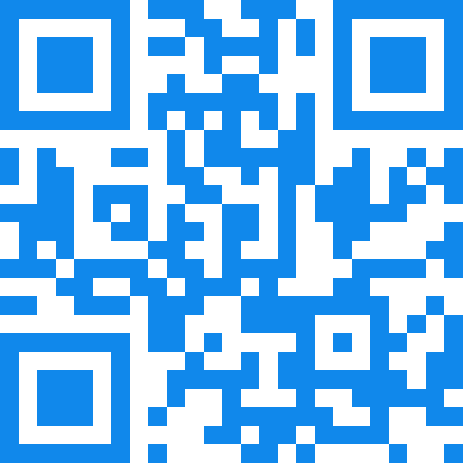

In [199]:
import requests

headers = {"user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36"}

resp = requests.get("https://www.zhihu.com/signin?next=%2F", headers=headers)
print(resp.status_code)
print(resp.content.decode('utf-8'))
print(resp.request.headers)


### lxml

In [21]:
!pip install lxml

/bin/sh: pip: command not found


In [206]:
# //div[@id='p_left']/div/dl[1]/dd/ul/li/a/@href
# //div[@class='content']/div//text()

# http://www.geyan123.com/
import requests
from lxml.etree import HTML

base_url = "http://www.geyan123.com/"
resp = requests.get(base_url, headers=headers)
html_tree = HTML(resp.content)
link_list = html_tree.xpath("//div[@id='p_left']/div/dl[1]/dd/ul/li/a/@href")

print(link_list)

with open("mingrenmingyan.txt", "a+", encoding='utf-8') as f:

    for link in link_list:
        url = base_url + link
        resp = requests.get(url, headers=headers)
        html_tree = HTML(resp.content)
        sentence_list = html_tree.xpath("//div[@class='content']/div//text()")
        print(sentence_list)
        f.writelines(sentence_list)
        f.write("\n")
    


['/renshenggeyan/31110.html', '/renshenggeyan/30077.html', '/renshenggeyan/30073.html', '/renshenggeyan/30071.html', '/renshenggeyan/30068.html', '/renshenggeyan/30067.html', '/renshenggeyan/208861.html', '/renshenggeyan/208827.html', '/renshenggeyan/208835.html', '/renshenggeyan/208548.html']
['  \r\n', '\r\n', '手机访问本页：请用手机扫描下方二维码（微信、QQ等都可以扫描）\r\n', '\r\n', '4.因为生活简单，我多了聆听松涛、景观风雨、仰望星空、敞开心扉的机会，灵性俱足。千万不要错欣赏大自然、享受大自然的机会，人一辈子不容易，一定要好好享受生活。\r\n', '5.不喜欢的人少接触，但别在背后说坏话，说是非之人，必定是是非之人，谨记，祸从口出。\r\n', '6.在我们成长的青春里，总会遇见优秀得耀眼的人。我们不停追赶却总是匍匐在他们的影子里，那些自卑和敏感让我们学会努力，当我们也渐渐优秀时，才发现是他们指引了我们的青春。\r\n', '7.希望永在前方，痴痴的前行，不回头，不观望，哪怕一个人在孤独的路上，也会心的一笑，温柔而宽厚的模样。\r\n', '8.对年轻人来说，很多时候，', '人生', '的伤害是必须的。年轻就是碰壁的过程，碰壁多了，就可以领悟很多，形成自己真正的知识系统，这是书本和别人的经验教不会的。生活不是童话故事，不可能没有伤害。\r\n', '9.有人说，对于不开心忘记就好，可忘记，是忘，还是记？也许我们最大的错误就是说了忘记，但却忘了放弃。或许除了遗忘，没有什么能抹去曾经走过的痕迹。\r\n', '10.情之为伤，苦煞多霜；情之为悲，冷落成灰。几度萧索，素眉浅画，芳华一刹，醉翻几页？尽言飘洒，谁笺梦话？情若尘沙，浮生寒鸦。\r\n', '11.有一只表的人知道现在几点了，有两只表的人则无法确定时间。\r\n', '12.我从不担心我努力了不优秀，只担心优秀的人都比我更努力。\r\n', '13.生活让我们习惯了伪装、掩盖、

['  \r\n', '\r\n', '手机访问本页：请用手机扫描下方二维码（微信、QQ等都可以扫描）\r\n', '\r\n']
['  \r\n', '\r\n', '手机访问本页：请用手机扫描下方二维码（微信、QQ等都可以扫描）\r\n', '\r\n']
['  \r\n', '\r\n', '手机访问本页：请用手机扫描下方二维码（微信、QQ等都可以扫描）\r\n', '\r\n']
['  \r\n', '\r\n', '手机访问本页：请用手机扫描下方二维码（微信、QQ等都可以扫描）\r\n', '\r\n']
['  \r\n', '\r\n', '手机访问本页：请用手机扫描下方二维码（微信、QQ等都可以扫描）\r\n', '\r\n']
['  \r\n', '\r\n', '手机访问本页：请用手机扫描下方二维码（微信、QQ等都可以扫描）\r\n', '\r\n']
['  \r\n', '\r\n', '手机访问本页：请用手机扫描下方二维码（微信、QQ等都可以扫描）\r\n', '\r\n']
['  \r\n', '\r\n', '手机访问本页：请用手机扫描下方二维码（微信、QQ等都可以扫描）\r\n', '\r\n']


In [207]:
headers

{'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36'}

### 将常见的爬虫逻辑进行封装

In [210]:
import requests
from lxml.etree import HTML

def get_content_by_xpath(url, xpath):
    headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36'}
    resp = requests.get(url, headers=headers)
    html = HTML(resp.content)
    content = html.xpath(xpath)
    return content



In [212]:
url = "http://www.geyan123.com/"
xpath = "//div[@id='p_left']/div/dl[1]/dd/ul/li/a/@href"

get_content_by_xpath(url, xpath)

['/renshenggeyan/31110.html',
 '/renshenggeyan/30077.html',
 '/renshenggeyan/30073.html',
 '/renshenggeyan/30071.html',
 '/renshenggeyan/30068.html',
 '/renshenggeyan/30067.html',
 '/renshenggeyan/208861.html',
 '/renshenggeyan/208827.html',
 '/renshenggeyan/208835.html',
 '/renshenggeyan/208548.html']

### 家庭作业：
- 抓取新浪股票主页：`https://finance.sina.com.cn/stock/`的所有要闻
- `//div[@class='hdline']/h2/a/@href`
- `//h1/text()`
- `//div[@class='article']/p/text()`或`//div[@class='articalContent']/span/text()`

### 案例1
- 爬去天天基金网的基金当日涨幅数据和基金名称
- 将采集到的数据存储到csv文件中
- 案例URL：http://fund.eastmoney.com/004846.html

In [214]:
# 基金名称：//div[@class='fundDetail-tit']/div/text()
# 当日涨幅：//dl[@class='dataItem02']/dd[1]/span[2]/text()

fund_incr = get_content_by_xpath("http://fund.eastmoney.com/004846.html", "//dl[@class='dataItem02']/dd[1]/span[2]/text()")
fund_name = get_content_by_xpath("http://fund.eastmoney.com/004846.html", "//div[@class='fundDetail-tit']/div/text()")

print(fund_incr)
print(fund_name)


['1.25%']
['南华瑞盈混合发起C']


## Ajax数据爬取

### 什么是Ajax

### 接口数据采集
http://fund.eastmoney.com/js/fundcode_search.js
所有基金名称列表代码

http://fund.eastmoney.com/js/jjjz_gs.js?dt=1463791574015
所有基金公司名称列表代码



### 案例分析：微博接口数据分析实战
- https://passport.weibo.cn/signin/login
- 获取热门微博的接口数据

In [225]:
import requests

resp = requests.get("https://m.weibo.cn/api/container/getIndex?containerid=102803&openApp=0")
# print(resp.json())
json_dict = resp.json()
json_dict["data"]['cards'][5]['mblog']['raw_text']


'#上海旅行# 【上海#气象局回应上海上空现海市蜃楼#】   称上海今晨上空出现的海市蜃楼奇观比较少见，但并不是海市蜃楼，系“物影上投”现象。我是不懂，只觉得漂亮就好，哈哈，你觉得呢？欣赏一下各地的→_→ \u200b\u200b\u200b'

### 练习：分析百度翻译的接口
- 分析百度翻译的接口
- 利用百度翻译的接口制作一个自己的翻译机

In [229]:
import requests

kw = input("请输入你要翻译的词语：")

data = {"kw": kw}

resp = requests.post("https://fanyi.baidu.com/sug", headers=headers, data=data)

print(resp.json())



请输入你要翻译的词语：child
{'errno': 0, 'data': [{'k': 'child', 'v': 'n. 儿童; 小孩; 子女; 儿子; 女儿; 深受…影响的人;'}, {'k': 'children', 'v': ' child 的复数;'}, {'k': 'childhood', 'v': 'n. 童年; 幼年; 孩童时期;'}, {'k': 'childish', 'v': 'adj. 孩子的; 孩子气的; 稚嫩的; 幼稚的; 天真的;'}, {'k': "children's", 'v': ' 儿童; 儿童音乐; 儿童健康;'}]}


## 利用Selenium爬取动态网页的数据

In [53]:
!pip install selenium

/bin/sh: pip: command not found


**chromedriver的安装和配置**

> chromedriver国内镜像`http://npm.taobao.org/mirrors/chromedriver/83.0.4103.39/`

> chrome-V83国内下载地址：
- Windows:`https://www.iplaysoft.com/tools/chrome/`
- macOS:`http://www.pc6.com/mac/110545.html`

```python
from selenium import webdriver

option = webdriver.ChromeOptions()
# option.add_argument('headless')

# chrome浏览器配置
# Linux和macOS平台
driver = webdriver.Chrome('./chromedriver', options=option)

```

- 访问指定网页：`driver.get(target_url)`
- 通过xpath获取页面的单个元素：`driver.find_element_by_xpath(xpath_expression)`
- 通过xpath获取页面的多个元素：`driver.find_elements_by_xpath(xpath_expression)`
- 获取元素的文本内容：`driver.find_element_by_xpath(xpath_expression).text`
- 点击页面元素：`driver.find_element_by_xpath(xpath_expression).click()`
- 往输入框输入内容：`driver.find_element_by_xpath(xpath_expression).send_keys(input_text)`
- 获取元素中的属性：`driver.find_element_by_xpath(xpath_expression).get_attribute('href')`
- 获取当前页面的URL：`driver.current_url`
- 关闭网页：`driver.quit()`
- 滚动鼠标到网页底部：`driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")`

In [230]:
# https://passport.weibo.cn/signin/login
from selenium import webdriver

option = webdriver.ChromeOptions()
# option.add_argument('headless')

# chrome浏览器配置
# Linux和macOS平台
driver = webdriver.Chrome('./chromedriver', options=option)

driver.get("https://passport.weibo.cn/signin/login")

driver.find_element_by_xpath("//input[@id='loginName']").click().send_keys("")
driver.find_element_by_xpath("//input[@id='loginPassword']").click().send_keys("")
driver.find_element_by_xpath("//a[@id='loginAction']").click()


### 案例：东方财富网数据采集
**背景介绍**
> 东方财富网（`https://www.eastmoney.com/`）是一家专业的互联网财经媒体，提供7*24小时的财经咨询及全球金融市场报价，汇聚全方位的综合财经新闻和进攻让那个市场资讯。

**目标**
- 1. http://quote.eastmoney.com/center/gridlist.html#hs_a_board
- 2. 抓取目标网页的股票涨跌信息
    - 例如：http://quote.eastmoney.com/sz000001.html

### 家庭作业：采集京东欧莱雅产品的评论
- 开发爬虫程序，在京东首页中搜索欧莱雅产品
- 采集搜索结果中产品的用户评论信息
- 每件商品至少采集10条评论（会员名， 初次评价内容）
- 将采集的评论保存到`jd_comment.csv`文件中

In [232]:
def conn_db(host, port, **kwagrs):
    print(kwagrs)
    print(args)



conn_db("127.0.0.1", "3306", 1, 4, 5, 6, db="demo", table="table1")

{'db': 'demo', 'table': 'table1'}
(1, 4, 5, 6)


### 验证码破解
- 知乎倒立汉字识别

In [ ]:
import csv

csv_obj = csv.reader(f)

In [ ]:
import tkinter


import wxpython

import pyqt